## Run demo & define basic function

In [1]:
from __future__ import division
import argparse
import pandas as pd

# useful stuff
import numpy as np
from scipy.special import expit
from sklearn.preprocessing import normalize

In [2]:
__authors__ = ['author1','author2','author3']
__emails__  = ['fatherchristmoas@northpole.dk','toothfairy@blackforest.no','easterbunny@greenfield.de']

In [14]:
def text2sentences(path):
    # feel free to make a better tokenization/pre-processing
    sentences = []
    with open(path, encoding='utf-8') as f: # 加了encoding='utf-8'，否则读txt时有bug
        for l in f:
            sentences.append( l.lower().split() )
    return sentences

def loadPairs(path):
    data = pd.read_csv(path, delimiter='\t')
    pairs = zip(data['word1'],data['word2'],data['similarity'])
    return pairs

In [20]:
# step from main stream
sentences = text2sentences('train.txt')

In [61]:
def get_basic_obj(sentences):
    w_id_dict = {}
    w_set = set()
    w_id = 0
    
    for sent in sentences:
        for word in sent:
            if word not in w_set:
                w_set.add(word)
                w_id_dict[word]=w_id
                w_id+=1
    
    sentence_set = sentences
    w_list = list(w_set)
    
    return w_id_dict, sentence_set, w_list

In [62]:
w2id, trainset, vocab = get_basic_obj(sentences)

In [72]:
def sample(omit):
    neg_ids = list(w2id.values())
    for id in omit: 
        neg_ids.remove(id)
    return neg_ids

In [74]:
class SkipGram:
    def __init__(self, sentences, nEmbed=100, negativeRate=5, winSize = 5, minCount = 5):
        self.w2id, self.trainset, self.vocab = get_basic_obj(sentences)
        # w2id: word to ID mapping
        # trainset: set of sentences
        # vocab: list of valid words

    def sample(self, omit):
        """samples negative words, ommitting those in set omit"""
        neg_ids = list(self.w2id.values())
        for id in omit: 
            neg_ids.remove(id)
        return neg_ids
        raise NotImplementedError('this is easy, might want to do some preprocessing to speed up')

    def train(self):
        for counter, sentence in enumerate(self.trainset):
            sentence = filter(lambda word: word in self.vocab, sentence)

            for wpos, word in enumerate(sentence):
                wIdx = self.w2id[word]
                winsize = np.random.randint(self.winSize) + 1
                start = max(0, wpos - winsize)
                end = min(wpos + winsize + 1, len(sentence))

                for context_word in sentence[start:end]:
                    ctxtId = self.w2id[context_word]
                    if ctxtId == wIdx: continue
                    negativeIds = self.sample({wIdx, ctxtId})
                    self.trainWord(wIdx, ctxtId, negativeIds)
                    self.trainWords += 1

            if counter % 1000 == 0:
                print(' > training %d of %d' % (counter, len(self.trainset)))
                self.loss.append(self.accLoss / self.trainWords)
                self.trainWords = 0
                self.accLoss = 0.

    def trainWord(self, wordId, contextId, negativeIds):
        raise NotImplementedError('here is all the fun!')

    def save(self,path):
        raise NotImplementedError('implement it!')

    def similarity(self,word1,word2):
        """
            computes similiarity between the two words. unknown words are mapped to one common vector
        :param word1:
        :param word2:
        :return: a float \in [0,1] indicating the similarity (the higher the more similar)
        """
        raise NotImplementedError('implement it!')

    @staticmethod
    def load(path):
        raise NotImplementedError('implement it!')

In [75]:
# step from main stream
sg = SkipGram(sentences)

In [81]:
# test the first 2 function
sg.sample({8,10})

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 18

Main Work Stream

In [ ]:
if __name__ == '__main__':

    parser = argparse.ArgumentParser()
    parser.add_argument('--text', help='path containing training data', required=True)
    parser.add_argument('--model', help='path to store/read model (when training/testing)', required=True)
    parser.add_argument('--test', help='enters test mode', action='store_true')

    opts = parser.parse_args()  # opts 这个对象你们能跑出来吗？

    if not opts.test:
        sentences = text2sentences(opts.text)
        sg = SkipGram(sentences)
        sg.train(...)
        sg.save(opts.model)

    else:
        pairs = loadPairs(opts.text)

        sg = SkipGram.load(opts.model)
        for a,b,_ in pairs:
            # make sure this does not raise any exception, even if a or b are not in sg.vocab
            print(sg.similarity(a,b))

In [5]:
    parser = argparse.ArgumentParser()
    parser.add_argument('--text', help='path containing training data', required=True)
    parser.add_argument('--model', help='path to store/read model (when training/testing)', required=True)
    parser.add_argument('--test', help='enters test mode', action='store_true')

_StoreTrueAction(option_strings=['--test'], dest='test', nargs=0, const=True, default=False, type=None, choices=None, help='enters test mode', metavar=None)

A small example from github

In [24]:
import numpy as np 
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

docs = ["we think uncertainty about unemployment",
		"uncertainty and fears about inflation",
		"we think fears about unemployment",
		"we think fears and uncertainty about inflation and unemployment",
		"constant negative press covfefe"]

In [25]:
docs_split = map(lambda x: x.split(),docs)
docs_words = list(itertools.chain(*docs_split))
words = np.unique(docs_words)

vectors = np.eye(words.shape[0])

In [31]:
vectors

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
M = 2
H = 3

U = np.random.randn(H,words.shape[0])
V = np.random.randn(words.shape[0],H)

In [19]:
def get_context(word_list):
	samples = []
	for word_ind in range(len(word_list)):
		context_inds = range(max(0,word_ind-M),
							min(word_ind+M+1,len(word_list)))
		context_inds.remove(word_ind)
		context = [word_list[el] for el in context_inds]
		samples.append((word_list[word_ind],context))
	return samples

In [20]:
training = list(itertools.chain(*map(get_context,docs_split)))


In [21]:
training

[]

In [32]:
def sigma(vector, deriv=False):
	if deriv:
		return sigma(vector)*(1-sigma(vector))
	else:
		return np.exp(vector)/np.exp(vector).sum()

log_likelihood = np.array([])
epochs = 10000
learning_rate = 0.001
tolerance = 0.001
discount = float(learning_rate)/epochs

for epoch in range(epochs):
	likelihood = 0
	for example in training:
		# Forward propogate word
		input_index = np.where(words==example[0])[0][0]
		l_input = vectors[input_index]
		l_hidden = np.dot(U,l_input)
		l_output = np.dot(V,l_hidden)
		l_output_a = sigma(l_output)
		errors = np.zeros(words.shape[0])
		# Compute the error for each word in context window
		for context in example[1]:
			output_index = np.where(words==context)[0][0]
			l_target= vectors[output_index]
			errors += (l_output_a-l_target)
		# Update the weights of V and W matrices
		delta2 = errors*sigma(l_output,True)
		V -= learning_rate*np.outer(delta2,l_hidden)
		U -= learning_rate*np.outer(np.dot(V.T,delta2),l_input)
		likelihood+=sum(map(np.log,l_output_a))
	log_likelihood=np.append(log_likelihood,likelihood)
	learning_rate -= discount
	if epoch<2: continue
	if (abs(likelihood-log_likelihood[-2])<tolerance):
		break

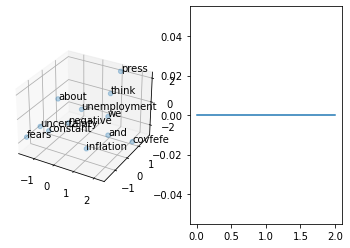

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection="3d")
ax.scatter(U[0],U[1],U[2], alpha=0.3)
for i,txt in enumerate(words):
	ax.text(U[0][i],U[1][i],U[2][i],txt, size=10)
ax = fig.add_subplot(1,2,2)
ax.plot(log_likelihood)
plt.show()